# Instalação de pacotes
1. anaconda (numpy, pandas, matplotlib, scipy)
> [https://www.anaconda.com/distribution/]
2. pyswarm
> `!pip install pyswarm`

# Carregar pacotes

In [1]:
import numpy as np
print(np.__version__)

import pandas as pd
print(pd.__version__)

import matplotlib
print(matplotlib.__version__)
from matplotlib import pyplot as plt

import scipy
print(scipy.__version__)
from scipy import stats
from scipy import optimize as opt

import pyswarm
print(pyswarm.__version__)
from pyswarm import pso

1.11.3
0.19.2
2.2.2
0.19.1
0.6


# Estrutura de dados experimentais

In [2]:
DadosExp=pd.DataFrame(columns=  [r"$X$",        r"$Y$",      r"$\sigma^2_{Y}$"],
                      data= [
                                [ 1.0000E+00, 3.37E+00, 1.00E+00 ],
                                [ 1.0000E+00, 2.75E+00, 1.00E+00 ],
                                [ 1.0000E+00, 5.12E+00, 1.00E+00 ],
                                [ 3.3750E+00, 8.91E+00, 8.56E-01 ],
                                [ 3.3750E+00, 7.00E+00, 8.56E-01 ],
                                [ 3.3750E+00, 6.90E+00, 8.56E-01 ],
                                [ 8.0000E+00, 8.20E+00, 1.58E+00 ],
                                [ 8.0000E+00, 1.08E+01, 1.58E+00 ],
                                [ 8.0000E+00, 8.11E+00, 1.58E+00 ],
                                [ 1.5625E+01, 9.69E+00, 1.97E-01 ],
                                [ 1.5625E+01, 1.07E+01, 1.97E-01 ],
                                [ 1.5625E+01, 9.98E+00, 1.97E-01 ],
                                [ 2.7000E+01, 1.07E+01, 4.01E-01 ],
                                [ 2.7000E+01, 9.58E+00, 4.01E-01 ],
                                [ 2.7000E+01, 9.18E+00, 4.01E-01 ]
                             ])
DadosExp

,$X$,$Y$,$\sigma^2_{Y}$
0,1.000,3.37,1.000
1,1.000,2.75,1.000
2,1.000,5.12,1.000
3,3.375,8.91,0.856
4,3.375,7.00,0.856
5,3.375,6.90,0.856
6,8.000,8.20,1.580
7,8.000,10.80,1.580
8,8.000,8.11,1.580
9,15.625,9.69,0.197


In [3]:
pd.DataFrame(columns=  [r"$X$",        r"$Y$",      r"$\sigma^2_{Y}$"],
                      data=np.array(DadosExp[0::3]))

,$X$,$Y$,$\sigma^2_{Y}$
0,1.000,3.37,1.000
1,3.375,8.91,0.856
2,8.000,8.20,1.580
3,15.625,9.69,0.197
4,27.000,10.70,0.401


In [4]:
nDadosExp = np.array(DadosExp)
NEXP=nDadosExp.shape[0]
print(NEXP)
XEXP=nDadosExp[:,0]
print(XEXP)
YEXP=nDadosExp[:,1]
print(YEXP)
VAREXP=nDadosExp[:,2]
print(VAREXP)

15
[  1.      1.      1.      3.375   3.375   3.375   8.      8.      8.
  15.625  15.625  15.625  27.     27.     27.   ]
[  3.37   2.75   5.12   8.91   7.     6.9    8.2   10.8    8.11   9.69
  10.7    9.98  10.7    9.58   9.18]
[ 1.     1.     1.     0.856  0.856  0.856  1.58   1.58   1.58   0.197
  0.197  0.197  0.401  0.401  0.401]


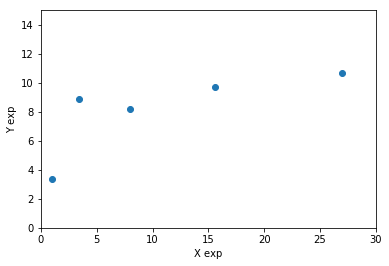

In [5]:
plt.scatter(XEXP[0::3],YEXP[0::3])
plt.xlabel("X exp")
plt.ylabel("Y exp")
plt.ylim(0,15)
plt.xlim(0,30)
plt.show()

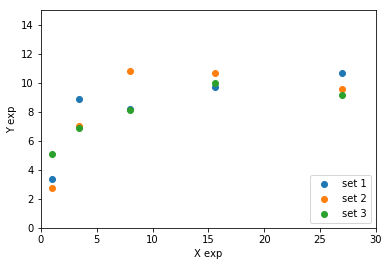

In [6]:
plt.scatter(XEXP[0::3],YEXP[0::3],label='set 1')
plt.scatter(XEXP[1::3],YEXP[1::3],label='set 2')
plt.scatter(XEXP[2::3],YEXP[2::3],label='set 3')
plt.xlabel("X exp")
plt.ylabel("Y exp")
plt.ylim(0,15)
plt.xlim(0,30)
plt.legend(loc=4)
plt.show()

In [7]:
XSET=[XEXP[i] for i in range(0,15,3)]
YAVE=[(YEXP[i]+YEXP[i+1]+YEXP[i+2])/3 for i in range(0,15,3)]
VARSET=[VAREXP[i] for i in range(0,15,3)]
print(XSET)
print(YAVE)

[1.0, 3.375, 8.0, 15.625, 27.0]
[3.7466666666666666, 7.6033333333333344, 9.0366666666666671, 10.123333333333333, 9.8200000000000003]


In [8]:
#YEXP is a sample from a normal distribution with YAVE and VARY
#its 95% confidence region is between +- 1.96 SIGY (SIGY = sqrt VARY)
#http://onlinestatbook.com/2/estimation/mean.html
#https://en.wikipedia.org/wiki/Confidence_interval

1.78670268213
5.70663065121


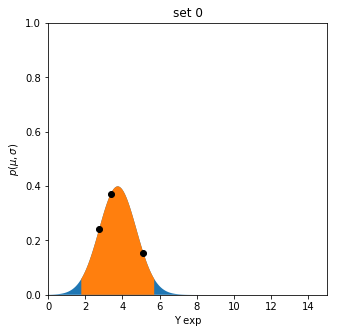

5.78996940116
9.41669726551


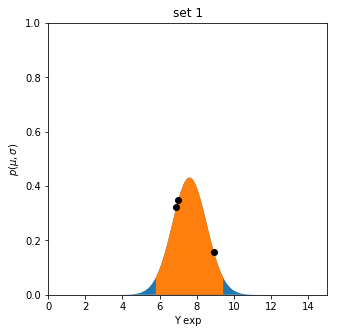

6.57303013976
11.5003031936


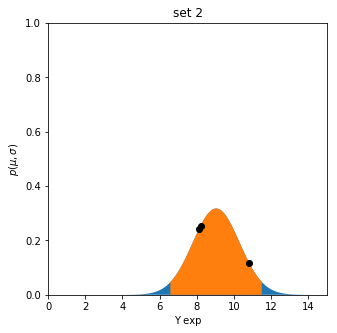

9.25340955065
10.993257116


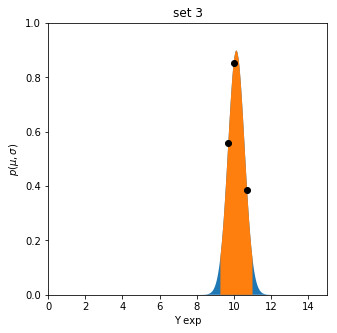

8.57886141503
11.061138585


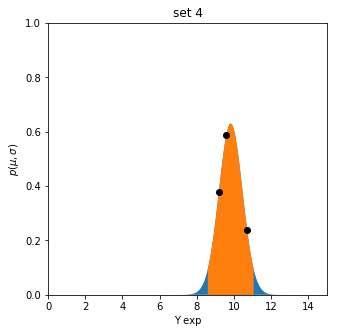

In [9]:
for j in range(5):
    plt.figure(figsize=[5,5])
    xi = np.linspace(0,15,1000)
    pi = stats.norm.pdf(xi,loc=YAVE[j],scale=np.sqrt(VARSET[j]))
#     plt.plot(xi,pi)

    Z1=stats.norm.ppf(q=.025, loc=YAVE[j], scale=np.sqrt(VARSET[j]))
    print(Z1)
    Z2=stats.norm.ppf(q=.975, loc=YAVE[j], scale=np.sqrt(VARSET[j]))
    print(Z2)

    xif1=xi[xi>Z1]
    xif2=xif1[xif1<Z2]

    pif1=pi[xi>Z1]
    pif2=pif1[xif1<Z2]

    plt.fill_between(xi,pi,0)
    plt.fill_between(xif2,pif2,0)

    plt.ylim(0,1)
    plt.xlim(0,15)

    plt.title("set "+str(j))
    plt.xlabel("Y exp")
    plt.ylabel(r"$p(\mu,\sigma)$")

    plt.scatter(YEXP[3*j],stats.norm.pdf(YEXP[3*j],loc=YAVE[j],scale=np.sqrt(VARSET[j])),color='k')
    plt.scatter(YEXP[3*j+1],stats.norm.pdf(YEXP[3*j+1],loc=YAVE[j],scale=np.sqrt(VARSET[j])),color='k')
    plt.scatter(YEXP[3*j+2],stats.norm.pdf(YEXP[3*j+2],loc=YAVE[j],scale=np.sqrt(VARSET[j])),color='k')

    plt.show()

In [10]:
#for 95% confidence
#5%/2=2.5%
#100%-2.5%=97.5% (.975)
Zn1=stats.norm.ppf(q=.025, loc=0, scale=1)
print(Zn1)
Zn2=stats.norm.ppf(q=.975, loc=0, scale=1)
print(Zn2)

-1.95996398454
1.95996398454


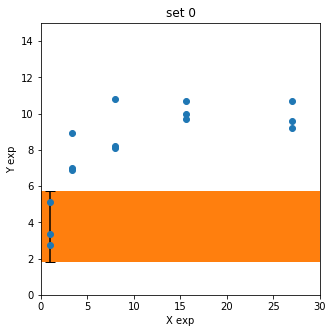

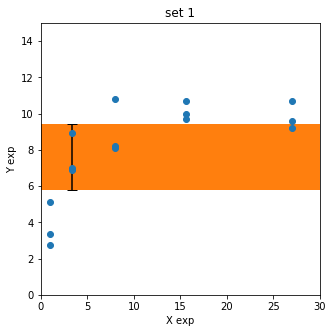

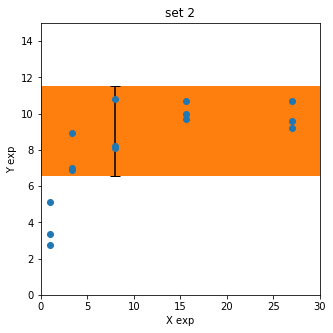

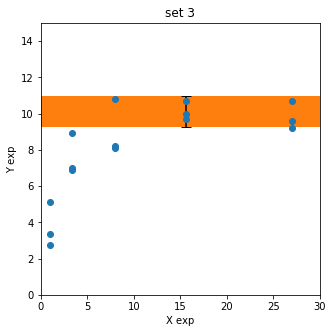

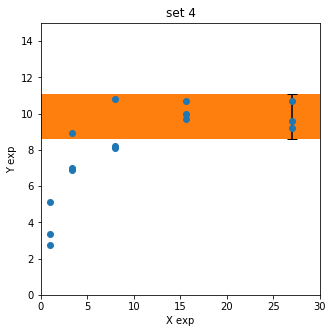

In [11]:
for j in range(5):
    plt.figure(figsize=[5,5])
    plt.scatter(XEXP,YEXP)
    plt.xlabel("X exp")
    plt.ylabel("Y exp")
    for xi, yi, vi in zip(XSET[j:j+1],YAVE[j:j+1],VARSET[j:j+1]):
        plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
    plt.ylim(0,15)
    plt.xlim(0,30)
    plt.title("set "+str(j))
    
    plt.fill_between([0,30],2*[YAVE[j]+Zn2*np.sqrt(VARSET[j])],2*[YAVE[j]-Zn2*np.sqrt(VARSET[j])],zorder=-1)
    plt.show()

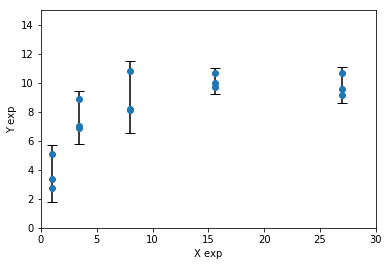

In [12]:
plt.scatter(XEXP,YEXP)
plt.xlabel("X exp")
plt.ylabel("Y exp")
for xi, yi, vi in zip(XSET,YAVE,VARSET):
    plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)
plt.show()

# Model

In [13]:
def MODEL(XE,A,B):
    YC=A*B*XE/(1.+B*XE)
    return YC

$$YC_{i}=f(XE_{i},A,B)$$

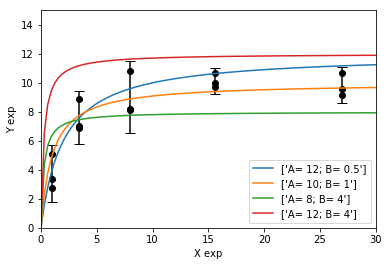

In [14]:
XC=np.linspace(0,30,100)


YC1=MODEL(XC,12,.5)
YC2=MODEL(XC,10,1)
YC3=MODEL(XC,8,4)

YC4=MODEL(XC,12,4)

plt.scatter(XEXP,YEXP,c='k')
plt.xlabel("X exp")
plt.ylabel("Y exp")
for xi, yi, vi in zip(XSET,YAVE,VARSET):
    plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)

plt.plot(XC,YC1,label=["A= "+str(12)+"; B= "+str(.5)])
plt.plot(XC,YC2,label=["A= "+str(10)+"; B= "+str(1)])
plt.plot(XC,YC3,label=["A= "+str(8)+"; B= "+str(4)])
plt.plot(XC,YC4,label=["A= "+str(12)+"; B= "+str(4)])
plt.legend()
plt.show()

# WLS-objF

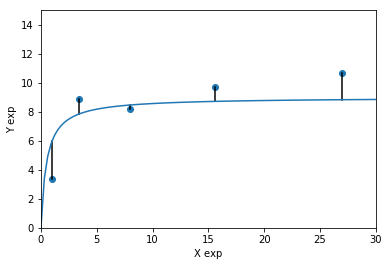

In [15]:
XC=np.linspace(0,30,100)

A=9
B=2

YC=MODEL(XC,A,B)

plt.scatter(XEXP[0::3],YEXP[0::3])
plt.xlabel("X exp")
plt.ylabel("Y exp")

for xi, yi in zip(XEXP[0::3],YEXP[0::3]):
    plt.plot([xi,xi],[yi,MODEL(xi,A,B)],c='k')

# for xi, yi, vi in zip(XAVE,YAVE,VARY):
#     plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)

plt.plot(XC,YC)

plt.show()

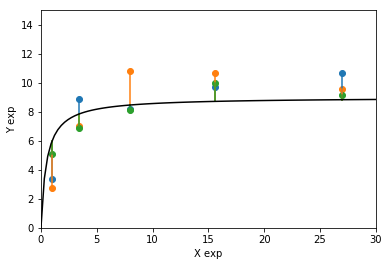

In [16]:
XC=np.linspace(0,30,100)

A=9
B=2

YC=MODEL(XC,A,B)

plt.scatter(XEXP[0::3],YEXP[0::3])
plt.scatter(XEXP[1::3],YEXP[1::3])
plt.scatter(XEXP[2::3],YEXP[2::3])
plt.xlabel("X exp")
plt.ylabel("Y exp")

for xi, yi in zip(XEXP[0::3],YEXP[0::3]):
    plt.plot([xi,xi],[yi,MODEL(xi,A,B)],c='C0')
for xi, yi in zip(XEXP[1::3],YEXP[1::3]):
    plt.plot([xi,xi],[yi,MODEL(xi,A,B)],c='C1')
for xi, yi in zip(XEXP[2::3],YEXP[2::3]):
    plt.plot([xi,xi],[yi,MODEL(xi,A,B)],c='C2')

# for xi, yi, vi in zip(XAVE,YAVE,VARY):
#     plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)

plt.plot(XC,YC,c='k')

plt.show()


$$F=\sum_{i}^{\mathrm{NE}}{\frac{(YC_{i}-YE_{i})^2}{\sigma_{i}^{2}}}$$

In [17]:
def objF(A,B):
    F=0
    for i in range(NEXP):
        YC=MODEL(XEXP[i],A,B)
        F += ((YC-YEXP[i])**2) / (VAREXP[i])
    return F

In [18]:
Ai = np.linspace(0,100,1000)
Bi = np.linspace(0,10,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)

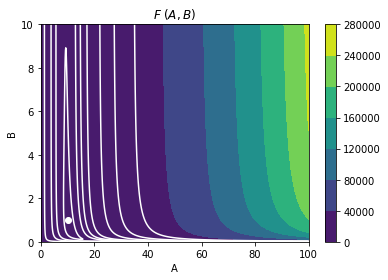

In [19]:
plt.contourf(Am,Bm,Fm)
plt.colorbar()
plt.scatter(10,1,c='w')

plt.contour(Am,Bm,Fm,levels=[100],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[500],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[1000],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[2000],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[5000],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[10000],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[20000],colors=['w'])

plt.xlabel("A")
plt.ylabel("B")
plt.title(r"$F\;(A,B)$")
plt.show()

In [20]:
Ai = np.linspace(0,20,1000)
Bi = np.linspace(0,2,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)

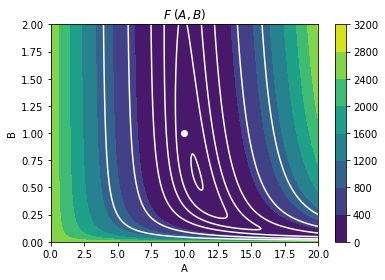

In [21]:
plt.contourf(Am,Bm,Fm)
plt.colorbar()
plt.scatter(10,1,c='w')
plt.contour(Am,Bm,Fm,levels=[20],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[50],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[100],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[200],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[500],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[1000],colors=['w'])
plt.xlabel("A")
plt.ylabel("B")
plt.title(r"$F\;(A,B)$")
plt.show()

In [22]:
Ai = np.linspace(9.,12.,1000)
Bi = np.linspace(0.4,1.1,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
print(np.nanmin(Fm))

18.0627263835


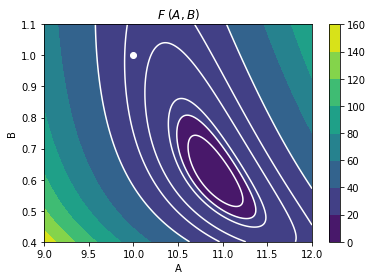

In [23]:


plt.contourf(Am,Bm,Fm)
plt.colorbar()

plt.scatter(10,1,c='w')

plt.contour(Am,Bm,Fm,levels=[19],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[20],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[21],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[25],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[30],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[40],colors=['w'])

plt.xlabel("A")
plt.ylabel("B")
plt.title(r"$F\;(A,B)$")

plt.show()

# SWARM

In [24]:
lb = [0, 0]
ub = [20, 2]

NIT=20
NP=10

historyI=np.array([0])
historyA=np.zeros(NP*(NIT+1))
historyB=np.zeros(NP*(NIT+1))
historyF=np.zeros(NP*(NIT+1))

def Tracer_objF(par):
    F=objF(par[0],par[1])
#     print(historyI[0],F,"(",par[0],par[1],")")
    
    historyA[historyI[0]]=par[0]
    historyB[historyI[0]]=par[1]
    historyF[historyI[0]]=F
    historyI[0]+=1
    
    return F

xopt, fopt = pso(Tracer_objF, lb, ub, maxiter=NIT, swarmsize=NP)
print(xopt, fopt)

Stopping search: maximum iterations reached --> 20
[ 10.90373281   0.62035005] 18.0638523822


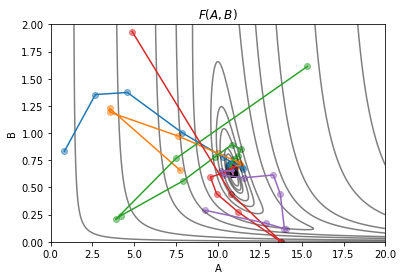

In [25]:
Ai = np.linspace(0.,20.,1000)
Bi = np.linspace(0.,2.,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)

# plt.contourf(Am,Bm,Fm)
# plt.colorbar()

plt.contour(Am,Bm,Fm,levels=[19],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[20],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[21],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[25],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[30],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[40],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[100],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[200],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[400],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[1000],colors=['k'],alpha=.5)
plt.contour(Am,Bm,Fm,levels=[2000],colors=['k'],alpha=.5)

for i in [0,1,3,4,5,]:
    plt.plot(historyA[i::NP],historyB[i::NP],ls='-')
    plt.scatter(historyA[i::NP],historyB[i::NP],alpha=.5)

for i in range(NP):
    plt.scatter(historyA[historyI[0]-1-i],historyB[historyI[0]-1-i],c='k')
plt.xlim(0.,20.)
plt.ylim(0.,2.)
plt.xlabel("A")
plt.ylabel("B")
plt.title(r'$F(A,B)$')
plt.show()

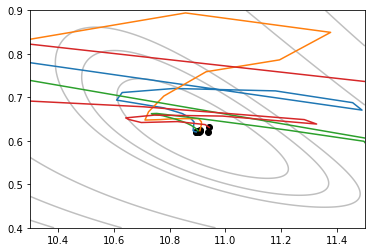

In [26]:
Ai = np.linspace(10.3,11.5,1000)
Bi = np.linspace(0.4,.9,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)


# plt.contourf(Am,Bm,Fm)
# plt.colorbar()

plt.contour(Am,Bm,Fm,levels=[19],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[20],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[21],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[30],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[40],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[50],colors=['k'],alpha=.25)

for i in range(NP)[::3]:
    plt.plot(historyA[i::NP],historyB[i::NP],alpha=1)

plt.xlim(10.3,11.5)
plt.ylim(0.4,.9)

for i in range(NP)[0::]:
    plt.scatter(historyA[historyI[0]-1-i],historyB[historyI[0]-1-i],c='k')

plt.show()

In [27]:
xopt, fopt

(array([ 10.90373281,   0.62035005]), 18.063852382218254)

# Gauss Newton

## 1d

In [28]:
def Newton(par,H):
    return par

In [29]:
def GaussNewton(par):
    return Newton(par,HGauss(par))

# linspace A
o modelo é linear em A 

$$ Y = A  (\frac{B X}{1+B X})$$

o método de Newton converge em 1 iteração
Devido a aproximação de Gauss, podem ser necessárias mais iterações.

24.0286836793


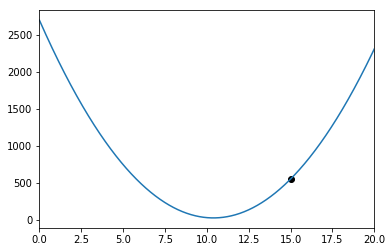

In [30]:
lx=0,20
Ai = np.linspace(*lx,1000)
Bi = 1

Fm=objF(Ai,Bi)
# print(Fm)
print(np.nanmin(Fm))

plt.plot(Ai,Fm)
plt.scatter(15,objF(15,Bi),c='k')
plt.xlim(*lx)

plt.show()

In [31]:
def GaussNewton_1dA_STEP(F,par0):
    par=par0*1
    YC=MODEL(XEXP,par0[0],par0[1])
    DYO = YC-YEXP
    
    DP = 1e-3
    DFP0 = ( MODEL(XEXP,par0[0]+DP,par0[1]) - MODEL(XEXP,par0[0]-DP,par0[1]) ) / (2*DP)
    
    U0=0
    for i in range(NEXP):
        U0 += DFP0[i] * (1/VAREXP[i]) * DYO[i]
    
    T=0
    for i in range(NEXP):
        T += DFP0[i]*DFP0[i] * (1/VAREXP[i])
    
    invT = 1/T
    
    delP = - invT *U0
       
    return np.array([par[0] + delP, par[1]])

In [32]:
def objF1dA(A):
    return objF(A,Bi)

def quadraticA(x,x0,G,H):
    return (1/2)*H*(x-x0)**2 + (x-x0)*G + objF1dA(x0)

def GradA(A):
    B=Bi
    G=0
    for i in range(NEXP):
        YC=MODEL(XEXP[i],A,B)
        
        DP = 1e-3
        DFP = ( MODEL(XEXP,A+DP,B) - MODEL(XEXP,A-DP,B) ) / (2*DP)
        
        G += 2*(YC-YEXP[i])*(DFP[i]) / (VAREXP[i])
    return G

def HGaussA(A):
    B=Bi
    H=0
    for i in range(NEXP):
        YC=MODEL(XEXP[i],A,B)
        
        DP = 1e-3
        DFP = ( MODEL(XEXP,A+DP,B) - MODEL(XEXP,A-DP,B) ) / (2*DP)
        
        H += 2*((DFP[i])**2) / (VAREXP[i])    
    return H

def Hrigor(A):
    B=Bi
    H=0
    
    YC=MODEL(XEXP,A,Bi)
    DYO = YC-YEXP

    DP = 1e-3
    DFP = ( MODEL(XEXP,A+DP,B) - MODEL(XEXP,A-DP,B) ) / (2*DP)
    
    DP = 1e-3
    D2FP = ( MODEL(XEXP,A+DP,B) -2*MODEL(XEXP,A,B) + MODEL(XEXP,A-DP,B) ) / (DP*DP)    
    
    for i in range(NEXP):
        YC=MODEL(XEXP[i],A,B)
#         print(DYO[i])
        H += 2*((DFP[i])**2) / (VAREXP[i])    + 2*D2FP[i] * DYO[i]  / (VAREXP[i])
    return H

Bi=1
print(Hrigor(15))
print(HGaussA(15))



49.4877319735
49.4877320447


24.0286836793


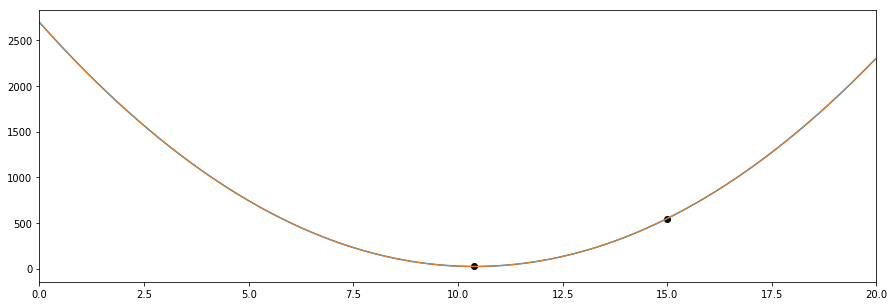

In [33]:
plt.figure(figsize=[15,5])
lx=0,20
Ai = np.linspace(*lx,1000)
Bi = 1

plt.plot(Ai,Fm)

plt.xlim(*lx)

plt.scatter(15,objF(15,Bi),c='k')


xopt1=GaussNewton_1dA_STEP(Tracer_objF,[15,Bi])
plt.scatter(xopt1[0],objF(xopt1[0],xopt1[1]),c='k')

##
Fm=objF(Ai,Bi)
# print(Fm)
print(np.nanmin(Fm))



Yq=quadraticA(Ai,15,GradA(15),HGaussA(15))
plt.plot(Ai,Yq,lw=1)

plt.show()

# linspace B

O modelo não e linear em B

$$ Y = A  (\frac{B X}{1+B X})$$

a convergência não é garantida,

são necessárias algumas iterações para se obter uma aproximação boa da solução



27.6284242114


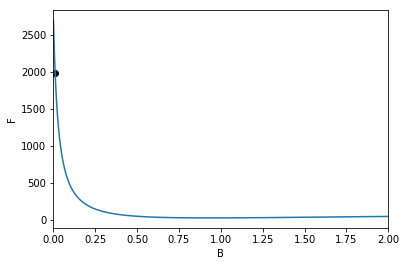

In [34]:
ly=0,2
Bi = np.linspace(*ly,1000)
Ai = 10

Fm=objF(Ai,Bi)
# print(Fm)
print(np.nanmin(Fm))

plt.plot(Bi,Fm)
plt.scatter(.01,objF(Ai,.01),c='k')
plt.xlim(*ly)

plt.xlabel("B")
plt.ylabel("F")

plt.show()

In [35]:
def objF1d(B):
    return objF(Ai,B)

def quadratic(x,x0,G,H):
    return (1/2)*H*(x-x0)**2 + (x-x0)*G + objF1d(x0)

def Grad(B):
    A=Ai
    G=0
    for i in range(NEXP):
        YC=MODEL(XEXP[i],A,B)
        
        DP = 1e-3
        DFP = ( MODEL(XEXP,A,B+DP) - MODEL(XEXP,A,B-DP) ) / (2*DP)
        
        G += 2*(YC-YEXP[i])*(DFP[i]) / (VAREXP[i])
    return G

def HGauss(B):
    A=Ai
    H=0
    for i in range(NEXP):
        YC=MODEL(XEXP[i],A,B)
        
        DP = 1e-3
        DFP = ( MODEL(XEXP,A,B+DP) - MODEL(XEXP,A,B-DP) ) / (2*DP)
        
        H += 2*((DFP[i])**2) / (VAREXP[i])    
    return H



In [36]:
def GaussNewton_1dB_STEP(F,par0):
    par=par0*1
    YC=MODEL(XEXP,par0[0],par0[1])
    DYO = YC-YEXP
    
    DP = 1e-3
    DFP1 = ( MODEL(XEXP,par0[0],par0[1]+DP) - MODEL(XEXP,par0[0],par0[1]-DP) ) / (2*DP)
    
    U1=0
    for i in range(NEXP):
        U1 += DFP1[i] * (1/VAREXP[i]) * DYO[i]
    
    T=0
    for i in range(NEXP):
        T += DFP1[i]*DFP1[i] * (1/VAREXP[i])
    
    invT = 1/T
    
    delP = - invT *U1
       
    return np.array([par[0], par[1] + delP])

$T(x)=F(x_0) + (x-x_{0})J(x_{0}) + \frac{1}{2} (x-x_0)^{2} H(x_{0})$

27.6284242114
[ 10.           0.07327417] 632.149171703
[ 10.           0.21564913] 181.650676184
[ 10.          0.4978147] 49.8993549986
[ 10.           0.83409884] 28.2279288274


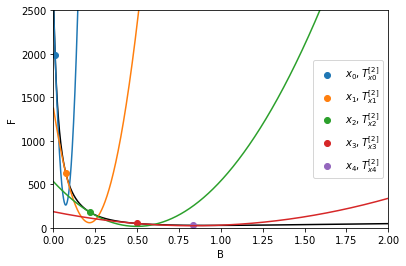

In [37]:
plt.figure()

ly=0,2
Bi = np.linspace(*ly,1000)
Ai = 10


Fm=objF(Ai,Bi)
# print(Fm)
print(np.nanmin(Fm))

plt.plot(Bi,Fm,zorder=0,c='k')

plt.scatter(.01,objF(Ai,.01),label=r"$x_0,T^{[2]}_{x0}$")
plt.xlim(*ly)
plt.ylim(0,2500)

Yq=quadratic(Bi,.01,Grad(.01),HGauss(.01))
plt.plot(Bi,Yq)

xopt1=[Ai,.01]
xopt1=GaussNewton_1dB_STEP(Tracer_objF,xopt1)
print(xopt1,objF(xopt1[0],xopt1[1]))
plt.scatter(xopt1[1],objF(xopt1[0],xopt1[1]),label=r"$x_1,T^{[2]}_{x1}$")

Yq=quadratic(Bi,xopt1[1],Grad(xopt1[1]),HGauss(xopt1[1]))
plt.plot(Bi,Yq)

xopt1=GaussNewton_1dB_STEP(Tracer_objF,xopt1)
print(xopt1,objF(xopt1[0],xopt1[1]))
plt.scatter(xopt1[1],objF(xopt1[0],xopt1[1]),label=r"$x_2,T^{[2]}_{x2}$")

Yq=quadratic(Bi,xopt1[1],Grad(xopt1[1]),HGauss(xopt1[1]))
plt.plot(Bi,Yq)

xopt1=GaussNewton_1dB_STEP(Tracer_objF,xopt1)
print(xopt1,objF(xopt1[0],xopt1[1]))
plt.scatter(xopt1[1],objF(xopt1[0],xopt1[1]),label=r"$x_3,T^{[2]}_{x3}$")


Yq=quadratic(Bi,xopt1[1],Grad(xopt1[1]),HGauss(xopt1[1]))
plt.plot(Bi,Yq)

xopt1=GaussNewton_1dB_STEP(Tracer_objF,xopt1)
print(xopt1,objF(xopt1[0],xopt1[1]))
plt.scatter(xopt1[1],objF(xopt1[0],xopt1[1]),label=r"$x_4,T^{[2]}_{x4}$")


plt.xlabel("B")
plt.ylabel("F")
plt.legend()
plt.show()

# 2d

o método de gauss newton pode ser usado de forma matricial para otimizar ambos parâmetros simultaneamente

18.0627258733


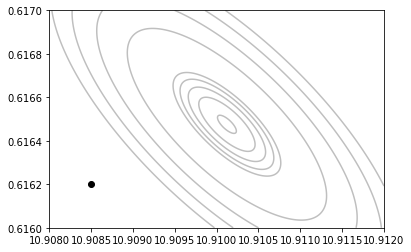

In [38]:
lx=10.908,10.912
ly=0.616,.617
Ai = np.linspace(*lx,1000)
Bi = np.linspace(*ly,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
print(np.nanmin(Fm))

# palt.contourf(Am,Bm,Fm)
# plt.colorbar()

plt.contour(Am,Bm,Fm,levels=[18.062726],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062727],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062728],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062729],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062730],colors=['k'],alpha=.25)

plt.contour(Am,Bm,Fm,levels=[18.062740],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062750],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062760],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062770],colors=['k'],alpha=.25)

plt.xlim(*lx)
plt.ylim(*ly)

xopt = [10.9085,.6162]

plt.scatter(xopt[0],xopt[1],c='k')

plt.show()

In [39]:
def GaussNewton_STEP(F,par0):
    par=par0*1
    YC=MODEL(XEXP,par0[0],par0[1])
    DYO = YC-YEXP
    
    DP = 1e-3
    DFP0 = ( MODEL(XEXP,par0[0]+DP,par0[1]) - MODEL(XEXP,par0[0]-DP,par0[1]) ) / (2*DP)
    DFP1 = ( MODEL(XEXP,par0[0],par0[1]+DP) - MODEL(XEXP,par0[0],par0[1]-DP) ) / (2*DP)
    
    U0=0
    U1=0
    for i in range(NEXP):
        U0 += DFP0[i] * (1/VAREXP[i]) * DYO[i]
        U1 += DFP1[i] * (1/VAREXP[i]) * DYO[i]
    
    T=np.zeros([2,2])
    for i in range(NEXP):
        T[0,0] += DFP0[i]*DFP0[i] * (1/VAREXP[i])
        T[0,1] += DFP0[i]*DFP1[i] * (1/VAREXP[i])
        T[1,0] += DFP1[i]*DFP0[i] * (1/VAREXP[i])
        T[1,1] += DFP1[i]*DFP1[i] * (1/VAREXP[i])
    
    invT = np.linalg.inv(T)
    
    delP = - invT @ np.array([[U0,U1]]).T
       
    return par + delP.T

18.0627258733


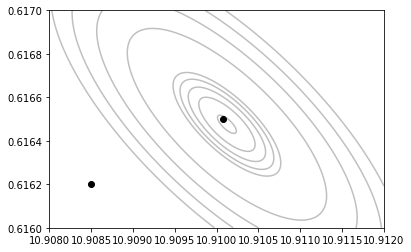

In [40]:
lx=10.908,10.912
ly=0.616,.617
Ai = np.linspace(*lx,1000)
Bi = np.linspace(*ly,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
print(np.nanmin(Fm))

# plt.contourf(Am,Bm,Fm)
# plt.colorbar()

plt.contour(Am,Bm,Fm,levels=[18.062726],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062727],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062728],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062729],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062730],colors=['k'],alpha=.25)

plt.contour(Am,Bm,Fm,levels=[18.062740],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062750],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062760],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062770],colors=['k'],alpha=.25)

plt.xlim(*lx)
plt.ylim(*ly)

plt.scatter(xopt[0],xopt[1],c='k')

xopt1=1*xopt


xopt1=GaussNewton_STEP(Tracer_objF,xopt1)[0]
plt.scatter(xopt1[0],xopt1[1],c='k')


# xopt1=GaussNewton_STEP(Tracer_objF,xopt1)[0]
# plt.scatter(xopt1[0],xopt1[1],c='k')


plt.show()

18.0627258733


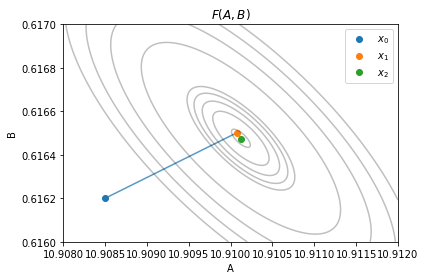

In [41]:
lx=10.908,10.912
ly=0.616,.617
Ai = np.linspace(*lx,1000)
Bi = np.linspace(*ly,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
print(np.nanmin(Fm))

# plt.contourf(Am,Bm,Fm)
# plt.colorbar()

plt.contour(Am,Bm,Fm,levels=[18.062726],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062727],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062728],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062729],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062730],colors=['k'],alpha=.25)

plt.contour(Am,Bm,Fm,levels=[18.062740],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062750],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062760],colors=['k'],alpha=.25)
plt.contour(Am,Bm,Fm,levels=[18.062770],colors=['k'],alpha=.25)

plt.xlim(*lx)
plt.ylim(*ly)

plt.scatter(xopt[0],xopt[1],label=r'$x_{0}$')


xopt1=GaussNewton_STEP(Tracer_objF,xopt)[0]
plt.scatter(xopt1[0],xopt1[1],label=r'$x_{1}$')


xopt2=GaussNewton_STEP(Tracer_objF,xopt1)[0]
plt.scatter(xopt2[0],xopt2[1],label=r'$x_{2}$')

plt.plot([xopt[0],xopt1[0]],[xopt[1],xopt1[1]],c="C0",alpha=.75,zorder=-1)
plt.plot([xopt1[0],xopt2[0]],[xopt1[1],xopt2[1]],c="C1",alpha=.75,zorder=-1)

# plt.xlim(10.908,10.911)
# plt.ylim(0.6161,.6166)

plt.xlabel("A")
plt.ylabel("B")
plt.title(r"$F(A,B)$")
plt.legend()
plt.show()

xopt=xopt1=xopt2

# Correl

In [42]:
Aopt, Bopt = xopt1

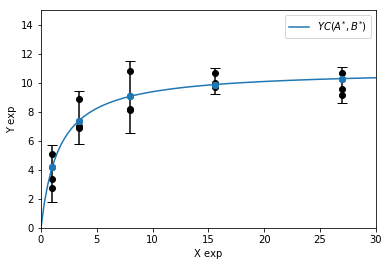

In [43]:
#EXP
plt.scatter(XEXP,YEXP,c='k')
plt.xlabel("X exp")
plt.ylabel("Y exp")
for xi, yi, vi in zip(XSET,YAVE,VARSET):
    plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)


#PRED

YPRED_sc = MODEL(XEXP,Aopt,Bopt)

X_pl = np.linspace(0,30,100)
YPRED_pl = MODEL(X_pl,Aopt,Bopt)

plt.plot(X_pl,YPRED_pl,label=r'$YC(A^{*},B^{*})$')
plt.scatter(XEXP,YPRED_sc)

plt.legend()

plt.show()

In [44]:
NUM=0.
DEN1=0.
DEN2=0.
NYT = 0
  
Y_EXP_AVE = np.average(YEXP)
Y_CALC_AVE = np.average(YPRED_sc)

for i in range(NEXP):
    NUM+=(YEXP[i]-Y_EXP_AVE)*(YPRED_sc[i]-Y_CALC_AVE)
    DEN1+=(YEXP[i]-Y_EXP_AVE)**2
    DEN2+=(YPRED_sc[i]-Y_CALC_AVE)**2

CORREL = NUM/np.sqrt(DEN1*DEN2)
print(CORREL)

0.925747868614


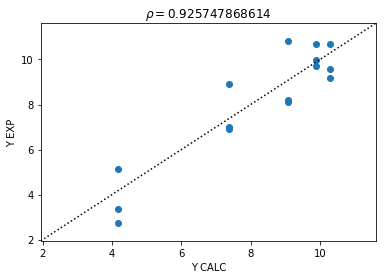

In [45]:
plt.scatter(YPRED_sc,YEXP)

MIN=min(np.nanmin(YEXP),np.nanmin(YPRED_sc))
MAX=max(np.nanmax(YEXP),np.nanmax(YPRED_sc))
RAN=MAX-MIN

lim= MIN-RAN/10, MAX+RAN/10
plt.xlim(*lim)
plt.ylim(*lim)

plt.plot([*lim],[*lim],c='k',ls=':')

plt.xlabel("Y CALC")
plt.ylabel("Y EXP")

plt.title(r'$\rho = $'+str(CORREL))

plt.show()

# Parametric covariance

In [46]:

NPAR=2

# COV_A

par0=xopt1*1
YC=MODEL(XEXP,par0[0],par0[1])
DYO = YC-YEXP

DP = 1e-9
DFP0 = ( MODEL(XEXP,par0[0]+DP,par0[1]) - MODEL(XEXP,par0[0]-DP,par0[1]) ) / (2*DP)
DFP1 = ( MODEL(XEXP,par0[0],par0[1]+DP) - MODEL(XEXP,par0[0],par0[1]-DP) ) / (2*DP)

U0=0
U1=0
for i in range(NEXP):
    U0 += DFP0[i] * (1/VAREXP[i]) * DYO[i]
    U1 += DFP1[i] * (1/VAREXP[i]) * DYO[i]

T=np.zeros([2,2])
for i in range(NEXP):
    T[0,0] += DFP0[i]*DFP0[i] * (1/VAREXP[i])
    T[0,1] += DFP0[i]*DFP1[i] * (1/VAREXP[i])
    T[1,0] += DFP1[i]*DFP0[i] * (1/VAREXP[i])
    T[1,1] += DFP1[i]*DFP1[i] * (1/VAREXP[i])

invT = np.linalg.inv(T)

COV = invT
print(COV)


[[ 0.105397   -0.03024364]
 [-0.03024364  0.01500471]]


In [47]:
dfcov=pd.DataFrame(COV,columns=["A","B"],index=["A","B"])
print("Matriz de covariância paramétrica")
dfcov

Matriz de covariância paramétrica


,A,B
A,0.105397,-0.030244
B,-0.030244,0.015005


# COR_A



In [48]:
SIGMA = np.array([np.sqrt(COV[i,i]) for i in range(NPAR)])

COR = np.zeros([NPAR,NPAR])
for i in range(NPAR):
    for j in range(NPAR):
        COR[i,j] = COV[i,j]/np.sqrt(COV[i,i]*COV[j,j])
print(COR)

[[ 1.         -0.76051218]
 [-0.76051218  1.        ]]


In [49]:
dfcor=pd.DataFrame(COR,columns=["A","B"],index=["A","B"])
print("Matriz de correlação paramétrica")

dfcor

Matriz de correlação paramétrica


,A,B
A,1.000000,-0.760512
B,-0.760512,1.000000


# Analysis

In [50]:
ALPHA = 0.95
cALPHA = 1.-ALPHA

GL_TStudent = NEXP - NPAR
GL_Xi2 = NEXP - NPAR 
GL_Elipse = NPAR
GL_Fisher = (NPAR, NEXP-NPAR)



# T Student

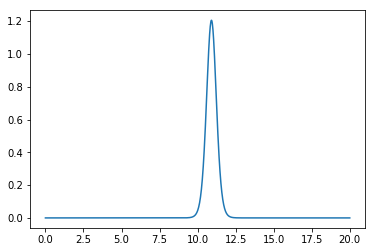

In [51]:
xi=np.linspace(0,20,1000)
TSp = stats.t.pdf(xi,GL_TStudent,loc=xopt[0],scale=np.sqrt(COV[0,0]))
plt.plot(xi,TSp)


plt.show()

In [52]:
print(cALPHA/2 , 1.-cALPHA/2, GL_TStudent )
TS = stats.t.ppf(1.-cALPHA/2 , GL_TStudent )
print(TS)

0.025000000000000022 0.975 13
2.16036865646


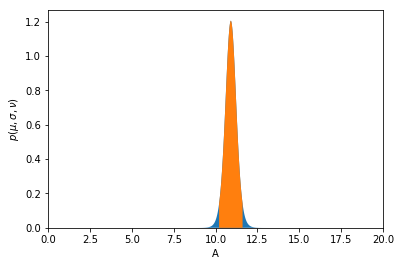

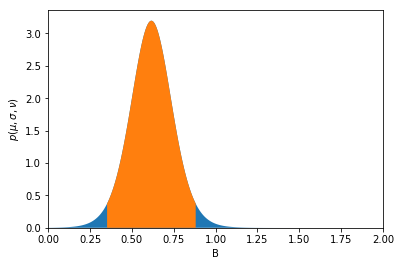

In [53]:
xi=np.linspace(0,20,1000)
TSp = stats.t.pdf(xi,GL_TStudent,loc=xopt1[0],scale=np.sqrt(COV[0,0]))
# plt.plot(xi,TSp)
plt.fill_between(xi,TSp,0)

XC1 = xopt1[0]-TS*np.sqrt(COV[0,0])
XC2 = xopt1[0]+TS*np.sqrt(COV[0,0])
X_axis = np.linspace(XC1,XC2,100)
TSC =  stats.t.pdf(X_axis,GL_TStudent,loc=xopt1[0],scale=np.sqrt(COV[0,0]))
# plt.plot(X_axis,TSC)

plt.fill_between(X_axis,TSC,0)

plt.xlabel("A")
plt.ylabel(r"$p(\mu,\sigma,\nu)$")
plt.xlim(0,20)
plt.ylim(0,None)

plt.show()

#other
xi=np.linspace(0,2,1000)
TSp = stats.t.pdf(xi,GL_TStudent,loc=xopt1[1],scale=np.sqrt(COV[1,1]))
# plt.plot(xi,TSp)
plt.fill_between(xi,TSp,0)

XC1 = xopt1[1]-TS*np.sqrt(COV[1,1])
XC2 = xopt1[1]+TS*np.sqrt(COV[1,1])
X_axis = np.linspace(XC1,XC2,100)
TSC =  stats.t.pdf(X_axis,GL_TStudent,loc=xopt1[1],scale=np.sqrt(COV[1,1]))
# plt.plot(X_axis,TSC)

plt.fill_between(X_axis,TSC,0)



plt.xlabel("B")
plt.ylabel(r"$p(\mu,\sigma,\nu)$")
plt.xlim(0,2)
plt.ylim(0,None)
plt.show()

In [54]:
PARAM=pd.DataFrame(data= np.array([[xopt1[0],xopt1[0]-TS*np.sqrt(COV[0,0]),xopt1[0]+TS*np.sqrt(COV[0,0])],
                                   [xopt1[1],xopt1[1]-TS*np.sqrt(COV[1,1]),xopt1[1]+TS*np.sqrt(COV[1,1])]]),
                   columns=[r"$\mu$",r"$\mu - t \;\sigma$",r"$\mu + t \;\sigma$"],
                   index=["A","B"])
PARAM

,$\mu$,$\mu - t \;\sigma$,$\mu + t \;\sigma$
A,10.910128,10.208766,11.611489
B,0.616474,0.351842,0.881105


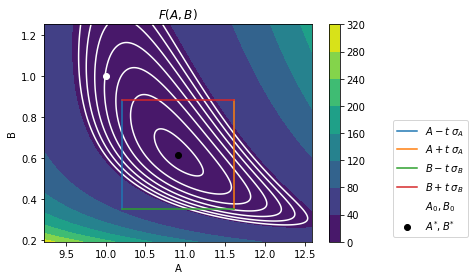

In [55]:
A0=xopt1[0]-TS*np.sqrt(COV[0,0])
A1=xopt1[0]+TS*np.sqrt(COV[0,0])
B0=xopt1[1]-TS*np.sqrt(COV[1,1])
B1=xopt1[1]+TS*np.sqrt(COV[1,1])
RA=A1-A0
RB=B1-B0

Ai = np.linspace(A0-.7*RA,A1+.7*RA,1000)
Bi = np.linspace(B0-.3*RB,B1+.7*RB,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
plt.contourf(Am,Bm,Fm)
plt.colorbar()
plt.scatter(10,1,c='w',label=r"$A_{0},B_{0}$")

plt.contour(Am,Bm,Fm,levels=[19],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[22],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[25],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[28],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[31],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[34],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[37],colors=['w'])




plt.scatter(*xopt1,c='k',label=r"$A^{*},B^{*}$")

plt.plot([A0,A0],[B0,B1],label=r'$A-t\;\sigma_{A}$')
plt.plot([A1,A1],[B0,B1],label=r'$A+t\;\sigma_{A}$')
plt.plot([A0,A1],[B0,B0],label=r'$B-t\;\sigma_{B}$')
plt.plot([A0,A1],[B1,B1],label=r'$B+t\;\sigma_{B}$')

plt.xlim(A0-.7*RA,A1+.7*RA)
plt.ylim(B0-.3*RB,B1+.7*RB)

plt.xlabel("A")
plt.ylabel("B")
plt.title(r'$F(A,B)$')
plt.legend(bbox_to_anchor=[1.6, 0.], loc='lower right')
plt.show()


# VAR_PRED

1d:


$$\sigma^{2}_\mathrm{YC} = \left({\frac{\partial YC}{\partial A}}\right)^{2} \sigma^{2}_{AB}$$

nd:

$$\sigma^{2}_\mathrm{YC} = J^{YC}_{AB} \sigma^{2}_{AB}  {J^{YC}_{AB}}^{\mathrm{T}}$$



In [56]:



PRED=np.zeros([NEXP,1,1])

for i in range(NEXP):
    DFP=np.array([[DFP0[i],DFP1[i]]]) #derivada do modelo em relação aos parametros não dependede de y/vary, só de x
    PRED[i,:,:]=DFP @ COV @ DFP.T #cov nao depende pontualmente de y/vary

for i in range(NEXP):    
    print("EXP# ",i,PRED[i])

EXP#  0 [[ 0.18059717]]
EXP#  1 [[ 0.18059717]]
EXP#  2 [[ 0.18059717]]
EXP#  3 [[ 0.11545733]]
EXP#  4 [[ 0.11545733]]
EXP#  5 [[ 0.11545733]]
EXP#  6 [[ 0.04043483]]
EXP#  7 [[ 0.04043483]]
EXP#  8 [[ 0.04043483]]
EXP#  9 [[ 0.03799001]]
EXP#  10 [[ 0.03799001]]
EXP#  11 [[ 0.03799001]]
EXP#  12 [[ 0.05323479]]
EXP#  13 [[ 0.05323479]]
EXP#  14 [[ 0.05323479]]


# ARRAY PRED

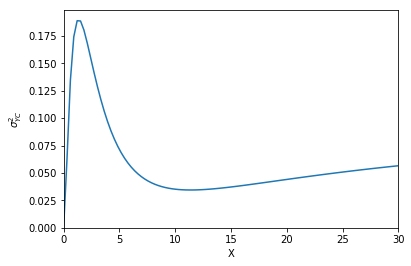

In [57]:
PRED=np.zeros(100)

for i in range(100):
    
    DP = 1e-3
    DFP0 = ( MODEL(X_pl[i],par0[0]+DP,par0[1]) - MODEL(X_pl[i],par0[0]-DP,par0[1]) ) / (2*DP)
    DFP1 = ( MODEL(X_pl[i],par0[0],par0[1]+DP) - MODEL(X_pl[i],par0[0],par0[1]-DP) ) / (2*DP)
    DFP=np.array([[DFP0,DFP1]]) #derivada do modelo em relação aos parametros não dependede de y/vary, só de x
    PRED[i]=DFP @ COV @ DFP.T #cov nao depende pontualmente de y/vary

plt.plot(X_pl,PRED)

plt.xlabel("X")
plt.ylabel(r"$\sigma^{2}_{YC}$")

plt.xlim(0,30)
plt.ylim(0,None)

plt.show()

# PRED (Y +- TS sqrt PRED)

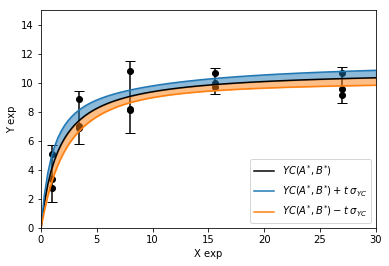

In [58]:
plt.scatter(XEXP,YEXP,c='k')
plt.xlabel("X exp")
plt.ylabel("Y exp")
for xi, yi, vi in zip(XSET,YAVE,VARSET):
    plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)


plt.plot(X_pl,YPRED_pl,label=r'$YC(A^{*},B^{*}) $',c='k')

plt.plot(X_pl,YPRED_pl+TS*np.sqrt(PRED),label=r'$YC(A^{*},B^{*})+ t\;\sigma_{YC}$')

plt.fill_between(X_pl,YPRED_pl+TS*np.sqrt(PRED),YPRED_pl,color="C0",alpha=.5)

plt.plot(X_pl,YPRED_pl-TS*np.sqrt(PRED),label=r'$YC(A^{*},B^{*})- t\;\sigma_{YC}$')
plt.fill_between(X_pl,YPRED_pl,YPRED_pl-TS*np.sqrt(PRED),color="C1",alpha=.5)


plt.legend()

plt.show()

# Ellipse de $\chi^{2}$
eq 5.37

In [59]:
#A FOBJ ESTA DISTRIBUIDA EM FORMA XI2
#TODAS OS PARAMETROS QUE GERAM FOBJ DENTRO DE UM INTERVALO DE CONFIANÇA SAO VALIDOS

5.99146454711


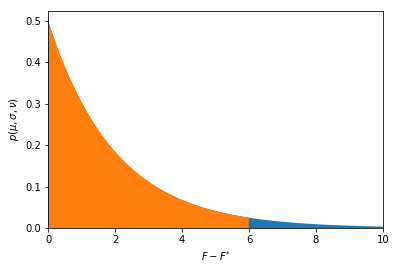

In [60]:
xi=np.linspace(0,10,1000)
Xi2p = stats.chi2.pdf(xi,GL_Elipse) #quais as loc e scale aqui?
plt.fill_between(xi,Xi2p,0)
# plt.plot(xi,Xi2p)

XI2ELL = stats.chi2.ppf(ALPHA , GL_Elipse ) #LIMITE SUPERIOR UNILATERAL
print(XI2ELL)

xi=np.linspace(0,XI2ELL,1000)
Xi2p = stats.chi2.pdf(xi,GL_Elipse) #quais as loc e scale aqui?
# plt.plot(xi,Xi2p,0)
plt.fill_between(xi,Xi2p,0)

plt.xlabel(r"$F-F^{*}$")
plt.ylabel(r"$p(\mu,\sigma,\nu)$")

plt.xlim(0,10)
plt.ylim(0,None)

plt.show()

In [61]:
XI2ELL = stats.chi2.ppf(ALPHA , GL_Elipse ) #LIMITE SUPERIOR UNILATERAL
print(XI2ELL)


xopt2=np.array([10,1])
print(objF(*xopt2),'-',objF(*xopt1),'~',(xopt2-xopt1) @ np.linalg.inv(COV) @ (xopt2-xopt1).T)

5.99146454711
27.8480034152 - 18.0627258737 ~ 10.2259960751


In [62]:
#FAZER OU UM GRID REGULAR OU UM GRID ESTOCASTICO
#EM CADA PONTO DO GRID TESTAR (xopt2-xopt1) @ np.linalg.inv(COV) @ (xopt2-xopt1).T), NÃO RECALCULAR FOBJ !
#FILTRAR (xopt2-xopt1) @ np.linalg.inv(COV) @ (xopt2-xopt1).T) <  XI2ELIPSE E DESENHAR ELIPSE

In [63]:
good=[]
for xi in np.linspace(0,20,1000):
    for yi in np.linspace(0,2,1000):
        xopt2=np.array([xi,yi])
        f=(xopt2-xopt1) @ np.linalg.inv(COV) @ (xopt2-xopt1).T
        if f<XI2ELL:
            good+=[[xi,yi,1*f]]

        

In [64]:
Agood=np.array(good)
print(Agood.shape)

(12132, 3)


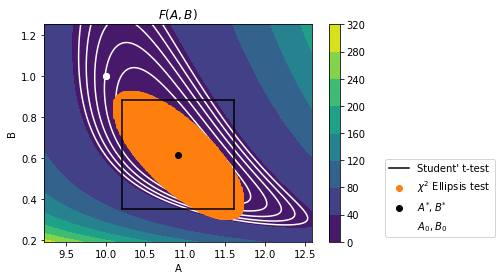

In [65]:


A0=xopt1[0]-TS*np.sqrt(COV[0,0])
A1=xopt1[0]+TS*np.sqrt(COV[0,0])
B0=xopt1[1]-TS*np.sqrt(COV[1,1])
B1=xopt1[1]+TS*np.sqrt(COV[1,1])
RA=A1-A0
RB=B1-B0

Ai = np.linspace(A0-.7*RA,A1+.7*RA,1000)
Bi = np.linspace(B0-.3*RB,B1+.7*RB,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
plt.contourf(Am,Bm,Fm)
plt.colorbar()
plt.scatter(10,1,c='w')
# plt.contour(Am,Bm,Fm,levels=[20],colors=['w'])
# plt.contour(Am,Bm,Fm,levels=[40],colors=['w'])
# plt.contour(Am,Bm,Fm,levels=[100],colors=['w'])

plt.contour(Am,Bm,Fm,levels=[19],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[22],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[25],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[28],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[31],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[34],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[37],colors=['w'])



plt.plot([A0,A0],[B0,B1],label=r"Student' t-test",c='k')
plt.plot([A1,A1],[B0,B1],c='k')
plt.plot([A0,A1],[B0,B0],c='k')
plt.plot([A0,A1],[B1,B1],c='k')

plt.xlim(A0-.7*RA,A1+.7*RA)
plt.ylim(B0-.3*RB,B1+.7*RB)

plt.xlabel("A")
plt.ylabel("B")
plt.title(r'$F(A,B)$')

plt.scatter(Agood[:,0],Agood[:,1], label=r"$\chi^{2}$ Ellipsis test",zorder=2,c="C1")

plt.scatter(*xopt1,c='k',label=r"$A^{*},B^{*}$",zorder=2)
plt.scatter(10,1,label=r'$A_{0},B_{0}$',c='w')
plt.legend(bbox_to_anchor=[1.7, 0.], loc='lower right')

plt.show()

# Ellipse de fisher
eq 5.39

In [1]:
# ToDo
# Delta Par _T * invCovPar * Delta Par <= Fobj * (NP/(NE*NY-NP)) * Fisher(NP,NE*NY-NP)

# Xi2min & max

In [66]:
XI2MAX = stats.chi2.ppf(1.-cALPHA/2,GL_Xi2) #DCHIIN((1.D0+ALFA)/2.D0,GL)
XI2MIN = stats.chi2.ppf(cALPHA/2,GL_Xi2) #DCHIIN((1.D0-ALFA)/2.D0,GL)
print(XI2MIN,'<',fopt,'<',XI2MAX)

#COMPARAR O XI2 OBTIDO COM OS XI2MIN E XI2MAX
#COMPARAR COM 5 DADOS DE P3 VS MODELO P1 E MODELO P5, COM MUITO ERRO VS COM POUCO ERRO
#PRECISAREMOS DE OUTRA FACTORY PARA ISSO

chi2minmax=pd.DataFrame(data=[[XI2MIN,fopt,XI2MAX]],columns=[r"$\chi^{2}_{\mathrm{min}}$",r"$F^{*}$","$\chi^{2}_{\mathrm{max}}$"],index=[r"$YC$ ( $A$,$B$ ) "])
chi2minmax

5.00875051181 < 18.0638523822 < 24.7356048849


,$\chi^{2}_{\mathrm{min}}$,$F^{*}$,$\chi^{2}_{\mathrm{max}}$
"$YC$ ( $A$,$B$ )",5.008751,18.063852,24.735605


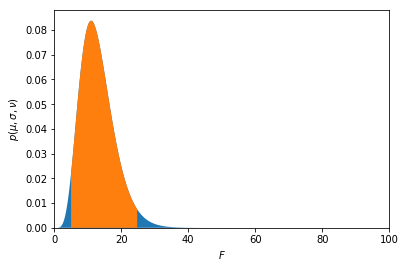

In [67]:
xi=np.linspace(0,100,1000)
Xi2p = stats.chi2.pdf(xi,GL_Xi2) #quais as loc e scale aqui?
plt.fill_between(xi,Xi2p,0)
# plt.plot(xi,Xi2p)

xi=np.linspace(XI2MIN,XI2MAX,1000)
Xi2p = stats.chi2.pdf(xi,GL_Xi2) #quais as loc e scale aqui?
# plt.plot(xi,Xi2p,0)
plt.fill_between(xi,Xi2p,0)

plt.xlabel(r"$F$")
plt.ylabel(r"$p(\mu,\sigma,\nu)$")

plt.xlim(0,100)
plt.ylim(0,None)

plt.show()

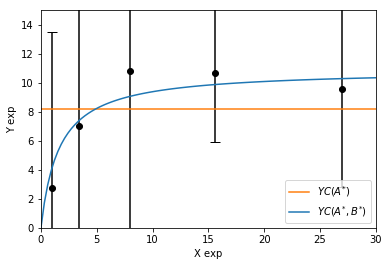

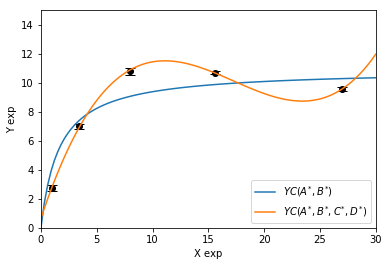

In [68]:
#EXP
plt.scatter(XEXP[1::3],YEXP[1::3],c='k')
plt.xlabel("X exp")
plt.ylabel("Y exp")
for xi, yi, vi in zip(XEXP[1::3],YEXP[1::3],VARSET):
    plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi*30),color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)


plt.axhline(np.average(YEXP[1::3]),c='C1',label=r'$YC(A^{*})$')
#PRED

YPRED_sc = MODEL(XEXP,Aopt,Bopt)

X_pl = np.linspace(0,30,100)
YPRED_pl = MODEL(X_pl,Aopt,Bopt)

plt.plot(X_pl,YPRED_pl,label=r'$YC(A^{*},B^{*})$')
# plt.scatter(XEXP,YPRED_sc)

plt.legend(loc=4)

plt.show()

#EXP
plt.scatter(XEXP[1::3],YEXP[1::3],c='k')
plt.xlabel("X exp")
plt.ylabel("Y exp")
for xi, yi, vi in zip(XEXP[1::3],YEXP[1::3],VARSET):
    plt.errorbar(x=xi, y=yi, yerr=Zn2*np.sqrt(vi)*.1,color='black',zorder=0,capsize=5)
plt.ylim(0,15)
plt.xlim(0,30)

#PRED

YPRED_sc = MODEL(XEXP,Aopt,Bopt)

X_pl = np.linspace(0,30,100)
YPRED_pl = MODEL(X_pl,Aopt,Bopt)

Y_poly=np.polyval(x=X_pl,p=np.polyfit(XEXP[1::3],YEXP[1::3],deg=3))

plt.plot(X_pl,YPRED_pl,label=r'$YC(A^{*},B^{*})$')
plt.plot(X_pl,Y_poly,label=r'$YC(A^{*},B^{*},C^{*},D^{*})$')
# plt.scatter(XEXP,YPRED_sc)

plt.legend(loc=4)

plt.show()

In [69]:
XI2MIN2 = stats.chi2.ppf(cALPHA/2,5-2) #DCHIIN((1.D0-ALFA)/2.D0,GL)
XI2MAX2 = stats.chi2.ppf(1.-cALPHA/2,5-2) #DCHIIN((1.D0+ALFA)/2.D0,GL)
XI2MIN1 = stats.chi2.ppf(cALPHA/2,5-1) #DCHIIN((1.D0-ALFA)/2.D0,GL)
XI2MAX1 = stats.chi2.ppf(1.-cALPHA/2,5-1) #DCHIIN((1.D0+ALFA)/2.D0,GL)

def objF1():
    F=0
    for i in range(NEXP)[1::3]:
        YC=MODEL(XEXP[i],A,B)
        F += ((np.average(YEXP[1::3])-YEXP[i])**2) / (VAREXP[i]*50)
    return F

def objF2(A,B):
    F=0
    for i in range(NEXP)[1::3]:
        YC=MODEL(XEXP[i],A,B)
        F += ((YC-YEXP[i])**2) / (VAREXP[i]*50)
    return F

fopt1= objF1()
fopt2=objF2(*xopt)

In [70]:
chi2minmax=pd.DataFrame(data=[[XI2MIN2,fopt2,XI2MAX2],
                              [XI2MIN1,fopt1,XI2MAX1]],columns=[r"$\chi^2_{min}$",r"$F^{*}$","$\chi^2_{max}$"],index=[r"$YC$ ( $A$,$B$ ) ",r"$YC$ ( $A$ ) ",])
chi2minmax

,$\chi^2_{min}$,$F^{*}$,$\chi^2_{max}$
"$YC$ ( $A$,$B$ )",0.215795,0.173696,9.348404
$YC$ ( $A$ ),0.484419,1.457863,11.143287


In [71]:
#                                  NEXP - NPAR 
XI2MIN2 = stats.chi2.ppf(cALPHA/2,5-2) #DCHIIN((1.D0-ALFA)/2.D0,GL)
XI2MAX2 = stats.chi2.ppf(1.-cALPHA/2,5-2) #DCHIIN((1.D0+ALFA)/2.D0,GL)
XI2MIN4 = stats.chi2.ppf(cALPHA/2,5-4) #DCHIIN((1.D0-ALFA)/2.D0,GL)
XI2MAX4 = stats.chi2.ppf(1.-cALPHA/2,5-4) #DCHIIN((1.D0+ALFA)/2.D0,GL)

def objF2(A,B):
    F=0
    for i in range(NEXP)[1::3]:
        YC=MODEL(XEXP[i],A,B)
        F += ((YC-YEXP[i])**2) / (VAREXP[i]*.5)
    return F

def objF4():
    F=0
    for i in range(NEXP)[1::3]:
        YC=np.polyval(x=[XEXP[i]],p=np.polyfit(XEXP[1::3],YEXP[1::3],deg=3))
        F += ((YC-YEXP[i])**2) / (VAREXP[i]*.5)
    return F[0]

fopt2=objF2(*xopt)
fopt4=objF4()

In [72]:
chi2minmax=pd.DataFrame(data=[[XI2MIN2,fopt2,XI2MAX2],
                              [XI2MIN4,fopt4,XI2MAX4]],columns=[r"$\chi^2_{min}$",r"$F^{*}$","$\chi^2_{max}$"],index=[r"$YC$ ( $A$,$B$ ) ",r"$YC$ ( $A$,$B$,$C$,$D$ ) ",])
chi2minmax

,$\chi^2_{min}$,$F^{*}$,$\chi^2_{max}$
"$YC$ ( $A$,$B$ )",0.215795,17.369616,9.348404
"$YC$ ( $A$,$B$,$C$,$D$ )",0.000982,0.082512,5.023886


# Fisher

18.0638523822 28.63972453


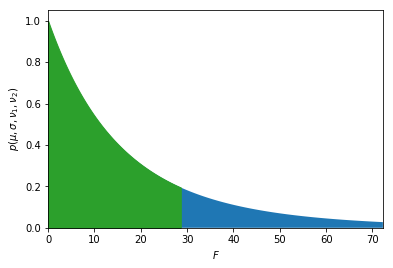

In [73]:
xi=np.linspace(1e-7,4,1000)
Fishp = stats.f.pdf(xi,*GL_Fisher) #quais as loc e scale aqui?
# plt.plot(xi*fopt,Fishp)
plt.fill_between(xi*fopt,Fishp,0)

Flim = fopt*(1+(GL_Fisher[0]/GL_Fisher[1])*stats.f.ppf(ALPHA,*GL_Fisher))
print(fopt,Flim)

xi=np.linspace(1e-7,Flim/fopt,1000)
Fishp = stats.f.pdf(xi,*GL_Fisher) #quais as loc e scale aqui?
plt.fill_between(xi*fopt,Fishp,0,color="C2")
# plt.plot(xi*fopt,Fishp)

plt.xlabel(r"$F$")
plt.ylabel(r"$p(\mu,\sigma,\nu_1,\nu_2)$")

plt.xlim(1e-7,4*fopt)
plt.ylim(0,None)

plt.show()

In [74]:
#FAZER OU UM GRID REGULAR OU UM GRID ESTOCASTICO
#CALCULAR FLIM
#EM CADA PONTO DO GRID RECALCULAR FOBJ !
#FILTRAR f<fLIM E DESENHAR ELIPSE

In [75]:
Flim = fopt*(1+(GL_Fisher[0]/GL_Fisher[1])*stats.f.ppf(ALPHA,*GL_Fisher))
print(fopt, '<', Flim)

18.0638523822 < 28.63972453


In [76]:
good=[]
for xi in np.linspace(0,20,1000):
    for yi in np.linspace(0,2,1000):
        xopt2=np.array([xi,yi])
        f=objF(*xopt2)
        if f<Flim:
            good+=[[xi,yi,1*f]]

        

In [77]:
Fgood=np.array(good)
print(Fgood.shape)

(22055, 3)


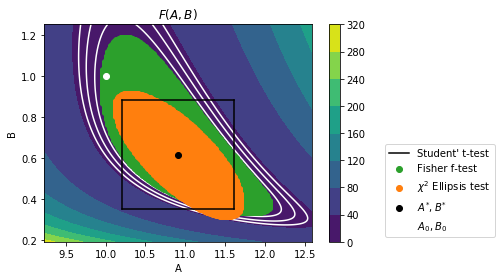

In [78]:


A0=xopt1[0]-TS*np.sqrt(COV[0,0])
A1=xopt1[0]+TS*np.sqrt(COV[0,0])
B0=xopt1[1]-TS*np.sqrt(COV[1,1])
B1=xopt1[1]+TS*np.sqrt(COV[1,1])
RA=A1-A0
RB=B1-B0

Ai = np.linspace(A0-.7*RA,A1+.7*RA,1000)
Bi = np.linspace(B0-.3*RB,B1+.7*RB,1000)
Am,Bm=np.meshgrid(Ai,Bi)
Fm=objF(Am,Bm)
plt.contourf(Am,Bm,Fm)
plt.colorbar()
plt.scatter(10,1,c='w')
# plt.contour(Am,Bm,Fm,levels=[20],colors=['w'])
# plt.contour(Am,Bm,Fm,levels=[40],colors=['w'])
# plt.contour(Am,Bm,Fm,levels=[100],colors=['w'])

plt.contour(Am,Bm,Fm,levels=[19],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[22],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[25],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[28],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[31],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[34],colors=['w'])
plt.contour(Am,Bm,Fm,levels=[37],colors=['w'])




plt.plot([A0,A0],[B0,B1],label=r"Student' t-test",c='k')
plt.plot([A1,A1],[B0,B1],c='k')
plt.plot([A0,A1],[B0,B0],c='k')
plt.plot([A0,A1],[B1,B1],c='k')

plt.xlim(A0-.7*RA,A1+.7*RA)
plt.ylim(B0-.3*RB,B1+.7*RB)

plt.xlabel("A")
plt.ylabel("B")
plt.title(r'$F(A,B)$')

plt.scatter(Fgood[:,0],Fgood[:,1], label="Fisher f-test",zorder=2,c="C2")

plt.scatter(Agood[:,0],Agood[:,1], label=r"$\chi^{2}$ Ellipsis test",zorder=2,c='C1')

plt.scatter(*xopt1,c='k',label=r"$A^{*},B^{*}$",zorder=2)

plt.scatter(10,1,label=r'$A_{0},B_{0}$',c='w',zorder=2)

plt.legend(bbox_to_anchor=[1.7, 0.], loc='lower right')

plt.show()



# plt.scatter(Agood[:,0],Agood[:,1], label=r"$\chi^{2}$ Ellipsis test")

# A0=xopt1[0]-TS*np.sqrt(COV[0,0])
# A1=xopt1[0]+TS*np.sqrt(COV[0,0])
# B0=xopt1[1]-TS*np.sqrt(COV[1,1])
# B1=xopt1[1]+TS*np.sqrt(COV[1,1])

# plt.plot([A0,A0],[B0,B1],c='k',label="Student' t-test")
# plt.plot([A1,A1],[B0,B1],c='k')
# plt.plot([A0,A1],[B0,B0],c='k')
# plt.plot([A0,A1],[B1,B1],c='k')

# plt.scatter(*xopt1,label=r'$\alpha_{\mathrm{min}}$')



# plt.legend()

# plt.show()